In [11]:
#Necessary imports
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [12]:
#Creating dataset
samples = 100
centres = [[-0.5, 0.5], [0.5, -0.5]]    #2 classes with clusters around the centre points
X, y = datasets.make_blobs(n_samples=samples, random_state=2, centers=centres, cluster_std=0.4)

<function matplotlib.pyplot.show(*args, **kw)>

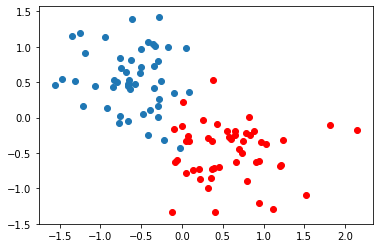

In [13]:
#Plotting the class 0 and 1 data points
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1], c='r')
plt.show

In [14]:
#Convert the data into tensors
x_data = torch.tensor(X)
y_data = torch.tensor(y.reshape(100,1))

In [15]:
class Percep(nn.Module):
    def __init__(self, in_size, out_size):
        super().__init__()
        self.linear = nn.Linear(in_size, out_size)
    def forward(self, x):
        y_pred = self.linear(x)
        return torch.sigmoid(y_pred)
    
def get_params():
    w,b = model.parameters()
    return w[0][0].item(), w[0][1].item(), b[0].item()

def plot_compare():
    w1,w2,b = get_params()
    x = np.array([-2,2])
    y = w1*x1 + w2*x2 + b
    plt.plot(x,y,'r')
    plt.scatter(X,Y)
    plt.show()
    
def plot_fit():
    w1,w2,b = get_params()
    x1 = np.array([-2,2])
    x2 = (w1*x1 + b)/-w2
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1], c='r')
    plt.plot(x1, x2, c='g')
    plt.show()
    

In [16]:
model = Percep(2,1)

In [17]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)

In [18]:
epoch = 500
losses = []
for i in range(epoch):
    y_pred = model.forward(x_data.float())
    loss = criterion(y_pred, y_data.float())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss)

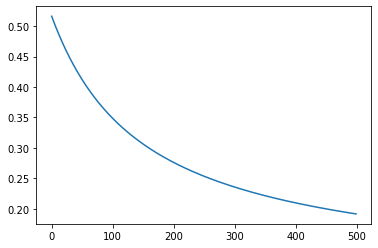

In [19]:
#Error as our training proceeded
plt.plot(range(epoch), losses)

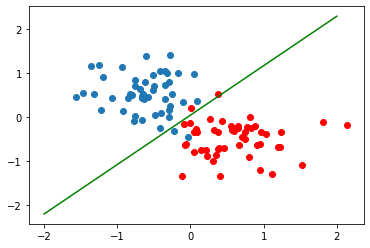

In [20]:
#Plotting our trained classifier
plot_fit()